In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pytensor.tensor as T
import pymc as pm
from pytensor.tensor import TensorVariable
from typing import Optional, Tuple
import arviz as az

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
# results_V = az.from_netcdf("WienerV_log.nc")
# results_VAT = az.from_netcdf("WienerVAT_log.nc")
# results_VT = az.from_netcdf("WienerVT_log.nc")
# results_VA = az.from_netcdf("WienerVA_log.nc")
# results_AT = az.from_netcdf("WienerAT_log.nc")

results_VAT = az.from_netcdf("WienerVAT_HierNAT.nc")
results_VA = az.from_netcdf("WienerVA_HierNAT.nc")
results_VT = az.from_netcdf("WienerVT_HierNAT.nc")
results_V = az.from_netcdf("WienerV_HierNAT.nc")
results_A = az.from_netcdf("WienerA_HierNAT.nc")
results_AT = az.from_netcdf("WienerAT_HierNAT.nc")

In [ ]:
df_comp = az.compare({ "VAT": results_VAT,"VT": results_VT,"AT": results_AT,"V": results_V,
                     "A": results_A,"VA": results_VA},ic="waic")

In [5]:
df_comp

,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
VAT,0,788.704473,103.923511,0.000000,6.318904e-01,61.797231,0.000000,True,log
VA,1,774.295301,92.927487,14.409172,2.520763e-12,62.789346,5.717239,True,log
V,2,772.803376,76.956490,15.901097,2.581300e-01,59.861725,8.484051,True,log
VT,3,763.831287,88.130407,24.873186,3.210231e-12,59.961343,7.595799,True,log
AT,4,620.072099,107.964457,168.632374,1.869292e-12,69.180705,35.865556,True,log
A,5,612.865650,94.204903,175.838823,1.099796e-01,69.357696,35.581208,True,log


Text(0.5, 0, 'ELPD WAIC')

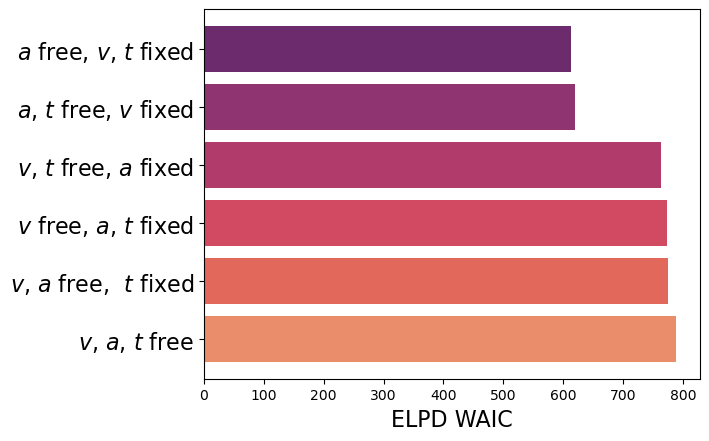

In [7]:
import seaborn as sns
labels = ['$\it{v}$, $\it{a}$, $\it{t}$ free','$\it{v}$, $\it{a}$ free,  $\it{t}$ fixed',
          '$\it{v}$ free, $\it{a}$, $\it{t}$ fixed', '$\it{v}$, $\it{t}$ free, $\it{a}$ fixed',
          '$\it{a}$, $\it{t}$ free, $\it{v}$ fixed', '$\it{a}$ free, $\it{v}$, $\it{t}$ fixed']
elpds = df_comp.elpd_waic.values
ses = df_comp.se.values
plt.barh(np.arange(len(labels)),elpds, color=sns.color_palette("flare",6))
plt.yticks(np.arange(len(labels)),labels,fontsize=16)
plt.xlabel('ELPD WAIC',fontsize=16)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


[]

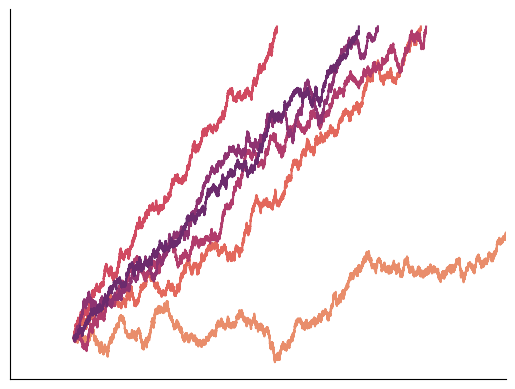

In [84]:
def create_onedrift(v,threshold=100,noise=1,dt=0.01,non_decision_time=90,sz = 1000):
    evidence = list()
    time_points = list()
    time=0
    x = 0 
    while abs(x) < threshold:
        x += v * dt + noise * np.sqrt(dt) * np.random.randn()
        time += dt
        time_points.append(time)
        evidence.append(x)
    time_points = [t + non_decision_time for t in time_points]
    decision = 1 if x > 0 else 0
    
    return time_points, evidence, decision
cols = sns.color_palette("flare",6)
d_rates = [0.1,0.2,0.4,0.25,0.3,0.21]
for j in range(6):
    t,x,z = create_onedrift(d_rates[j])
    plt.plot(t,x,color = cols[j])
plt.xlim([0,700])
ax = plt.gca()
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xticks([])
ax.set_yticks([])

In [33]:
abs(np.random.standard_normal(size=1))

array([0.53670184])